<a href="https://colab.research.google.com/github/amrios80/eda-jobs/blob/master/caoba/caoba_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projecto CAOBA (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** : (1) la lista
de más de 900 celulares publicados a la fecha en la plataforma, (2) todo el detalle de cada
uno de los celulares de esta lista, y (3) la información básica de los diferentes vendedores.


**Business Context:** Mamá no es muy tecnológica por lo que no hay necesidad de regalarle un celular de gama
alta. Probablemente un celular de máximo $1.200.000 sea más que suficiente, aunque si
lo puedo pagar a cuotas mucho mejor 😅. Además de que las características del celular
como la marca, el color, el tamaño de la pantalla, entre otras, sean las ideales para ella,
siempre me gusta revisar que el vendedor tenga buena reputación (ojalá que sea una
tienda oficial), que ofrezca garantía de al menos 6 meses y que el envío sea gratis 😁. Su
cumpleaños es muy pronto así que lo mejor es que el vendedor esté en los alrededores
de Bogotá para que el envío sea rápido. Para propósitos del ejercicio, lo anterior no debe
considerarse como restricciones estrictas sino más bien como características o
condiciones de compra deseadas.

**Restricciones:**
-precio <= 1200000
-preferible a cuotas
-marca, color, tamano de pantalla ideal para mama.  
-vendedor con buena reputacion.
-preferible tienda oficial
-garantia >= 6 meses
-envio gratis.
-alrededores de bogota.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Reporte de calidad y preparacion de los datos**

Preparar los datos y asegurar su calidad fue la parte mas compleja del ejercicio, el tamaño de los dataset y su formato .json dificultaron el cargue y su entendimiento.
Para solucionar lo anterior, se comprimieron los archivos mas pesados en formato .gz, se cargaron en un repositorio publico de github, desde collab se leyeron y se guardó cada uno en un dataset. El entendimiento por separado de cada dataset, permitió identificar las variables clave para el analisis asi como tambien los campos en comun para unificar la informacion, adicionalmente con las tecnicas para detectar de deteccion de datos nulos, se identificaron variables que no contaban con informacion y tampoco se podian imputar, razon por la cual se decidio eliminarlas como por ejemplo la variable:discounts en el dataset search_results y screen_size en el dataset items. En el entendimiento de los datasets se evidenciaron columnas a su vez en formato tipo .json cuya informacion fue extraida a traves funciones lambda diseñadas para cada uno de los campos, como por ejemplo los campos shipping y seller en el dataset search_result y el campo attributes del dataset de donde se extrajeron las caracteristicas de cada celular como: Brand, os, ram, color, screen_size, internal_memory, warranty_months, el mismo ejercicio de transformacion fue realizado para el dataset sellers con los campos: address y seller reputation de donde se extrajo la informacion de ubicacion geografica y calificacion del vendedor. Finalmente se consolidaron los tres datasets en 1 solo conteniendo las siguientes 19 columnas para el analisis:

1. item_id
2. price
3. installments_quantity
4. installments_amount
5. free_shipping
6. seller_id_x
7. sanitized_title
8. nickname
9. address_state
10. address_city
11. seller_reputation_level_id
12. official_store_id
13. condition
14. warranty_months
15. internal_memory
16. color
17. ram
18. brand
19. os



#                               Diagrama de Bloques

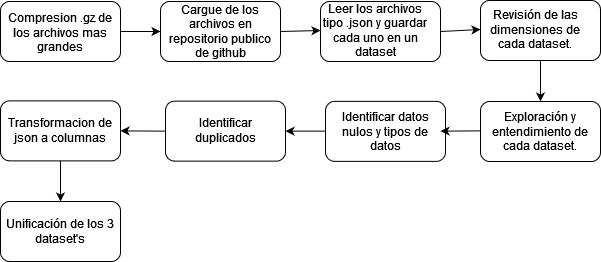

**1.1 Cargue de los datasets:** Se comprimen los dos mas grandes y se suben todos a un repositorio publico en github. Los archivos son .json, por lo cual se usa la funcion de pandas para la lectura de json.

In [ ]:
items_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/items.json.gz"
search_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/search_results.json.gz"
sellers_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/sellers.json"

# Loading the datasets
items_df = pd.read_json(items_url, compression='gzip')
search_results_df=pd.read_json(search_url, compression="gzip")
sellers_df=pd.read_json(sellers_url)

 **1.2 Revision de dimensiones de los datasets.** Se observa que items y search contienen el mismo numero de filas por ende pueden tener una relacion 1 a 1, el dataset sellers tiene 212 filas por lo que puede tener una relacion aproximada de 1 a 4 con respecto a los otros dataset. Se determina que se deben unir los tres en un solo dataframe

In [ ]:
print("dimensiones items:",items_df.shape)
print("dimensiones search results:",search_results_df.shape)
print("dimensiones sellers:",sellers_df.shape)

dimensiones items: (984, 45)
dimensiones search results: (984, 36)
dimensiones sellers: (212, 9)


 **1.3 Exploracion y Entendimiento de cada dataset**

**1.3.1 Exploracion dataset search_results (part1):** Se observa que el dataset contiene las caracteristicas detalladas de la publicacion de cada celular y le asocia un id para su identificacion. Las siguientes variables se identifican como importantes para el analisis:

*   id
*   sanitized_title
*   condition
*   site_id
*   price
*   available_quantity
*   order_backend
*   official_store_id
*   official_store_name
*   shipping
*   seller
*   promotions
*   discounts

Se observa que los campos shipping y seller son tipo .json y su informacion debe extraerse a columnas para el analisis.

In [ ]:
#Explorando el dataset
search_results_df.sample(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data
861,MCO1323889227,Zte Nubia Red Magic 8 Pro+ Transformers 5g Nx7...,new,784634-MCO70930144430_082023,MCO23314047,gold_special,,https://articulo.mercadolibre.com.co/MCO-13238...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_784634-MCO70930144...,COP,25,8299000.0,NaN,"{'price_id': '', 'amount': 8299000, 'condition...",500,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2043-08-03 04:00:00+00:00,"{'id': 73243604, 'nickname': 'GREYBAQUEROLEZCA...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 230528, 'rate': 0, ...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'179363289179': {'thumbnail': 'http://http2.m...
534,MCO2431731566,Redmi 13c 4 Ram 256 Gb,new,851991-MCO76864974169_062024,MCO27962256,gold_special,redmi-13c-4-ram-256-gb,https://articulo.mercadolibre.com.co/MCO-24317...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_851991-MCO76864974...,COP,41,500000.0,NaN,"{'price_id': '', 'amount': 500000, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-06-01 04:00:00+00:00,"{'id': 22349656, 'nickname': 'NEXTECHNOLOGYBTA'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 13889, 'rate': 0, '...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'180674413354': {'thumbnail': 'http://http2.m...
17,MCO1434183995,Honor Magic6 Lite Dual Sim 256 Gb Plateado 8 G...,new,865851-MLA78464727989_082024,MCO34239792,gold_special,honor-magic6-lite-dual-sim-256-gb-plateado-8-g...,https://www.mercadolibre.com.co/honor-magic6-l...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_865851-MLA78464727...,COP,18,1164900.0,2016500.0,"{'price_id': '', 'amount': 1164900, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-05-31 04:00:00+00:00,"{'id': 162681369, 'nickname': 'CELUMOVIL STORE'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 32358, 'rate': 0, '...",NaN,True,NaN,[],ZXKF65140,NaN,NaN,NaN,NaN


In [ ]:
#Se identifican los campos nulos y el tipo de datos para el dataset search_results
search_results_df[["id","sanitized_title","condition","site_id","price","available_quantity","order_backend","official_store_id","official_store_name","shipping","seller","promotions","discounts"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   984 non-null    object 
 1   sanitized_title      984 non-null    object 
 2   condition            984 non-null    object 
 3   site_id              984 non-null    object 
 4   price                984 non-null    float64
 5   available_quantity   984 non-null    int64  
 6   order_backend        984 non-null    int64  
 7   official_store_id    85 non-null     float64
 8   official_store_name  85 non-null     object 
 9   shipping             984 non-null    object 
 10  seller               984 non-null    object 
 11  promotions           984 non-null    object 
 12  discounts            0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 100.1+ KB


In [ ]:
# detectando duplicados por id
duplicates_by_id = search_results_df.loc[search_results_df["id"].duplicated(keep=False)]

In [ ]:
# el dataset search_results no tiene duplicados
duplicates_by_id.shape

(0, 36)

In [ ]:
# Transforma los campos tipo .json a columnas
search_results_df["seller_id"]= search_results_df['seller'].apply(lambda x: x['id'])
search_results_df["free_shipping"]= search_results_df['shipping'].apply(lambda x: x['free_shipping'])
search_results_df["installments_quantity"]= search_results_df['installments'].apply(lambda x: x['quantity'])
search_results_df["installments_amount"]= search_results_df['installments'].apply(lambda x: x['amount'])

cols=["id","price","installments_quantity","installments_amount","free_shipping","seller_id","sanitized_title","attributes","available_quantity"]
part1_search=search_results_df[ cols ]
part1_search.columns=["item_id","price","installments_quantity","installments_amount","free_shipping","seller_id","sanitized_title","search_attributes","available_quantity"]




 **1.3.2 Exploracion dataset Items (parte3):** El dataset contiene las caracteristicas de los celulares, tambien contiene el campo id que es comun con el anterior dataset. Las caracteristicas del celular se encuentran en el campo attributes (tipo .json) y de alli se  extrae item_id, Brand, os, ram, color, screen_size, internal_memory, warranty_months

In [ ]:
#Se visualiza una muestra de tres registros del dataset items_df
items_df.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing
393,MCO2460517578,MCO,Motorola Moto G54 5g 128 Gb Azul 8 Gb Ram,205036097,MCO1055,NaN,549900,549900,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24605...,865243-MCO77123850723_062024,http://http2.mlstatic.com/D_865243-MCO77123850...,"[{'id': '865243-MCO77123850723_062024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjkzOTg0', 'name': 'B...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 180767851476, 'price': 549900, 'attrib...",active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía de fábrica: 9 meses,None,MCO-CELLPHONES,None,[],False,2024-06-19T21:26:04.724Z,2024-08-16T15:41:02.305Z,0.8,False
774,MCO2412044862,MCO,Celular Motorola G24 256gb / 8ram / 50mpx,224855110,MCO1055,NaN,489900,489900,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24120...,680513-MCO76515063052_052024,http://http2.mlstatic.com/D_680513-MCO76515063...,"[{'id': '871400-MCO76514973830_052024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ01BUjU5NzU1', 'name': 'M...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 182953175635, 'price': 489900, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,None,MCO-CELLPHONES,None,[],False,2024-05-29T18:36:54.163Z,2024-09-25T02:11:26.408Z,0.9,False
549,MCO2589527898,MCO,Celular Infinix Hot 40i Dual Sim 256gb Dorado ...,291001852,MCO1055,NaN,484900,484900,NaN,COP,10,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-25895...,894612-MLU75146948712_032024,http://http2.mlstatic.com/D_894612-MLU75146948...,"[{'id': '894612-MLU75146948712_032024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ01FRGRjNjc4', 'name': 'M...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,MCO34730613,MCO-CELLPHONES,None,[],False,2024-08-01T16:41:44.045Z,2024-09-24T23:12:21.937Z,NaN,True


In [ ]:
#Se identifican los campos nulos y el tipo de datos para el dataset items_df
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                984 non-null    object 
 1   site_id                           984 non-null    object 
 2   title                             984 non-null    object 
 3   seller_id                         984 non-null    int64  
 4   category_id                       984 non-null    object 
 5   official_store_id                 85 non-null     float64
 6   price                             984 non-null    int64  
 7   base_price                        984 non-null    int64  
 8   original_price                    7 non-null      float64
 9   currency_id                       984 non-null    object 
 10  initial_quantity                  984 non-null    int64  
 11  sale_terms                        984 non-null    object 
 12  buying_m

In [ ]:
# detectando duplicados por id
duplicates_by_id_items = items_df.loc[items_df["id"].duplicated(keep=False)]

In [ ]:
# el dataset items no tiene duplicados
duplicates_by_id_items.shape

(0, 45)

In [ ]:
# Transformacion de json a columnas

import re #libreria para expresiones regulares
cols=["id","seller_id","official_store_id","price","warranty","seller_address","condition", "shipping","sale_terms","attributes"] # Seleccion de campos clave
part3_items=items_df[cols]
part3_items.columns=["item_id","seller_id","official_store_id","item_price","warranty","seller_address","condition", "shipping","sale_terms","item_attributes"] # cambio nombres de columnas

#Lambdas para extraer data del campo json atributos
def  find_brand( tokens ):
  for i in tokens:
    if i["id"]=="BRAND":
      return i["value_name"]
  return None

def find_internal_memory(tokens):
  for i in tokens:
    if i["id"]=="INTERNAL_MEMORY":
      return i["value_name"]
  return None

def find_screen_size(tokens):
  for i in tokens:
    if i["id"]=="SCREEN_SIZE":
      return i["value_name"]
  return None

def find_color(tokens):
  for i in tokens:
    if i["id"]=="COLOR":
      return i["value_name"]
  return None

def find_ram(tokens):
  for i in tokens:
    if i["id"]=="RAM":
      return i["value_name"]
  return None

def find_os(tokens):
  for i in tokens:
    if i["id"]=='OPERATING_SYSTEM_NAME':
      return i["value_name"]
  return None

#extraccion del numero de meses de garantia
def extract_months(data_line):
    # Regular expression to capture the number and the unit (años, meses, días)
    match = re.search(r'(\d+)\s*(años|meses|días)', str(data_line))
    if match:
        number = int(match.group(1))
        unit = match.group(2)
        # Convert the warranty period to months
        if unit == 'años':
            return number * 12
        elif unit == 'meses':
            return number
        elif unit == 'días':
            return round(number / 30)  # Approximate conversion of days to months
    return None

part3_items["warranty_months"]= part3_items['warranty'].apply(lambda x: extract_months(x) )
part3_items["internal_memory"]= part3_items['item_attributes'].apply(lambda x: find_internal_memory(x) )
part3_items["screen_size"]= part3_items['item_attributes'].apply(lambda x: find_screen_size(x) )
part3_items["color"]= part3_items['item_attributes'].apply(lambda x: find_color(x) )
part3_items["ram"]= part3_items['item_attributes'].apply(lambda x: find_ram(x) )
part3_items["brand"]= part3_items['item_attributes'].apply( lambda x: find_brand(x) )
part3_items["os"]= part3_items['item_attributes'].apply( lambda x: find_os(x) )

part3_items["DISPLAY_RESOLUTION"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="DISPLAY_RESOLUTION"), None))
part3_items["HEIGHT"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="HEIGHT"), None))
part3_items["WIDTH"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="WIDTH"), None))
part3_items["WEIGHT"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="WEIGHT"), None))
part3_items.loc[:, "ITEM_CONDITION"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="ITEM_CONDITION"),None))


<ipython-input-6-1806d977121b>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_items["warranty_months"]= part3_items['warranty'].apply(lambda x: extract_months(x) )
<ipython-input-6-1806d977121b>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_items["internal_memory"]= part3_items['item_attributes'].apply(lambda x: find_internal_memory(x) )
<ipython-input-6-1806d977121b>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
part3_items.sample(3)

,item_id,seller_id,official_store_id,item_price,warranty,seller_address,condition,shipping,sale_terms,item_attributes,warranty_months,internal_memory,screen_size,color,ram,brand,os,DISPLAY_RESOLUTION,HEIGHT,WIDTH,WEIGHT,ITEM_CONDITION
291,MCO1455436109,207591665,NaN,344000,Garantía de fábrica: 12 meses,"{'city': {'id': 'TUNPQ01FRGRjNjc4', 'name': 'M...",new,"{'mode': 'me2', 'methods': [], 'tags': ['self_...","[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...","[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",12.0,64 GB,None,Negro,4 GB,Samsung,Android,720 px x 1600 px,164.4 mm,76.3 mm,192 g,Nuevo
92,MCO1452039561,1884597321,NaN,234647,Sin garantía,"{'city': {'id': 'Q04tSE5IZW5neWFuZw', 'name': ...",new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...","[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,None,None,None,None,Generic,None,None,None,None,None,Nuevo
387,MCO2523562828,476229825,NaN,4899920,Garantía del vendedor: 3 meses,"{'city': {'id': 'TUNPQ0NIQTk2OTI1', 'name': 'C...",new,"{'mode': 'me2', 'methods': [], 'tags': ['self_...","[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...","[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",3.0,512 GB,None,Negro,12 GB,Samsung,Android,1440 px x 3088 px,163.4 mm,78.1 mm,233 g,Nuevo


In [ ]:
part3_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             984 non-null    object 
 1   seller_id           984 non-null    int64  
 2   official_store_id   85 non-null     float64
 3   item_price          984 non-null    int64  
 4   warranty            979 non-null    object 
 5   seller_address      984 non-null    object 
 6   condition           984 non-null    object 
 7   shipping            984 non-null    object 
 8   sale_terms          984 non-null    object 
 9   item_attributes     984 non-null    object 
 10  warranty_months     936 non-null    float64
 11  internal_memory     964 non-null    object 
 12  screen_size         0 non-null      object 
 13  color               409 non-null    object 
 14  ram                 962 non-null    object 
 15  brand               984 non-null    object 
 16  os      

**1.3.3 Exploracion dataset Sellers (part2):** Se observa que el dataset contiene la informacion del vendedor con el id como identificador, este id es diferente al campo con el mismo nombre de los dataset's search_results e items, para asociarlo a los demas dataset's se debe cruzar con el campo seller_id del dataset items. Se debe extraer la informacion de ubicacion y calificacion del cliente de los campos address y seller reputation que estan en formato .json

In [ ]:
sellers_df.head(3)

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status
0,1305122305,SASNEXTMOVIL20230207170924,CO,"{'city': 'Usaquén', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SASNEXTMOVIL...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,819549189,LUISALEJANDROPASCAGAZAPINZN,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/LUISALEJANDR...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
2,582439941,UDM SHOP,CO,"{'city': 'Medellín', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/UDM+SHOP,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


In [ ]:
# Se aplica funcion lambda para extraer la ubicacion geografica del vendedor y la puntuacion de la reputacion
sellers_df["address_state"]= sellers_df['address'].apply(lambda x: x['state'])
sellers_df["address_city"]= sellers_df['address'].apply(lambda x: x['city'])
sellers_df["seller_reputation_level_id"]= sellers_df['seller_reputation'].apply(lambda x: x['level_id'])

cols=["id","nickname","address_state","address_city","seller_reputation_level_id"]
part2_sellers=sellers_df[cols]
part2_sellers.columns=["seller_id","nickname","address_state","address_city","seller_reputation_level_id"]

In [ ]:
part2_sellers.sample(5)

,seller_id,nickname,address_state,address_city,seller_reputation_level_id
142,1190588231,JEANCANIELI-COR,HK-HK,Central & Western,5_green
3,738767370,EASYBUYSHOPCOMCO,CO-RIS,Pereira,5_green
42,556471382,TG PRODUCTOS,CO-DC,Martires,5_green
122,1724461334,CNXIAMENSUXINDIANZISHANCOR,CN-JX,Shangrao,5_green
136,219702071,JUANBY_ALFONSO,CO-DC,Teusaquillo,3_yellow


 **1.4 Union de los datasets en el dataset total**

In [ ]:
# Union del dataset search_results con seller por el campo seller_id
total=part1_search.merge(part2_sellers, on="seller_id", how="left")
total=total.merge(part3_items, on="item_id", how="left")
total.drop(columns=["seller_id_y"], inplace=True)

In [ ]:
#Conversiones de otras variables: ram
def convert_to_mb(size_str):
    # Split the number and unit from the input string
    if pd.isna(size_str):
        return np.nan
    if isinstance(size_str, float):
        return size_str
    size, unit = size_str.split()
    size = float(size)  # Convert the numeric part to a float

    # Convert based on the unit
    if unit.lower() == "kb":
        return size / 1024  # Convert KB to MB
    elif unit.lower() == "mb":
        return size  # Already in MB
    elif unit.lower() == "g" or unit.lower() == "gb":
        return size * 1024  # Convert GB to MB
    elif unit.lower() == "tb":
        return size * 1024 * 1024  # Convert TB to MB
    else:
        raise ValueError(f"Unknown unit: {unit}")

def convert_memory_to_mb(memory_str):
    # Split the number and unit from the input string
    if pd.isna(memory_str):
        return np.nan
    if isinstance(memory_str, float):
        return memory_str
    else:
        return np.nan



# Define the mapping from string to number
reputation_mapping = {
    "3_yellow": 3,
    "4_light_green": 4,
    "5_green": 5
}

# Apply the mapping to convert the string values to numbers
total['seller_reputation'] = total['seller_reputation_level_id'].map(reputation_mapping)

total["internal_memory_mb"] = total["internal_memory"].apply(convert_to_mb)
total["ram_mb"]= total["ram"].apply(convert_to_mb)

total["has_official_store"]=total["official_store_id"].apply(lambda x: 0 if pd.isna(x) else 1)
total["has_warranty"]=total["warranty_months"].apply(lambda x: 0 if pd.isna(x) else 1)

In [ ]:
total.shape
#984,17)

(984, 38)

In [ ]:
# Se borran las columnas que no son necesarias
total.drop(columns=["search_attributes","item_price","warranty","seller_address","shipping","sale_terms","item_attributes","screen_size"], inplace=True , axis=1, errors='ignore')

In [ ]:
total.sample(3)

,item_id,price,installments_quantity,installments_amount,free_shipping,seller_id_x,sanitized_title,available_quantity,nickname,address_state,address_city,seller_reputation_level_id,official_store_id,condition,warranty_months,internal_memory,color,ram,brand,os,DISPLAY_RESOLUTION,HEIGHT,WIDTH,WEIGHT,ITEM_CONDITION,seller_reputation,internal_memory_mb,ram_mb,has_official_store,has_warranty
844,MCO462898407,2529000.0,36,70250.0,True,73243604,huawei-p20-pro-clt-l29-6gb-128gb-dual-sim-duos,500,GREYBAQUEROLEZCANO,CO-DC,Kennedy,5_green,NaN,new,1.0,128 GB,None,6 GB,Huawei,None,1080 px x 2240 px,None,None,0.18 kg,Nuevo,5.0,131072.0,6144.0,0,1
719,MCO1378913187,359900.0,36,9997.0,True,1042129587,,1,BLACKBOX_TIENDA_VIRTUAL,CO-DC,Martires,5_green,NaN,new,6.0,64 GB,None,4 GB,HTC,Android,720 px x 1440 px,147.86 mm,71.4 mm,160 g,Nuevo,5.0,65536.0,4096.0,0,1
295,MCO1480378625,477900.0,36,13275.0,True,291001852,xiaomi-poco-poco-c65-dual-sim-128-gb-violeta-6...,1,TECNOSUPER.,CO-ANT,Medellín,5_green,NaN,new,12.0,128 GB,Violeta,6 GB,Xiaomi,Android,1600 px x 720 px,16.8 cm,7.8 cm,192 g,Nuevo,5.0,131072.0,6144.0,0,1


# **2. Analisis exploratorio de las variables mas relevantes**




### **2.1 Analisis Univariado**







**Atributo 1 Precio (Price) - Analisis medidas de tendencia central y distribucion:** El precio tiene una alta variabilidad se encuentran ofertas de ceulares desde 45.000 COP, sin embargo la mediana del precio es de 713.000 COP. En la grafica de bigotes se evidencia la alta variabilidad del precio.

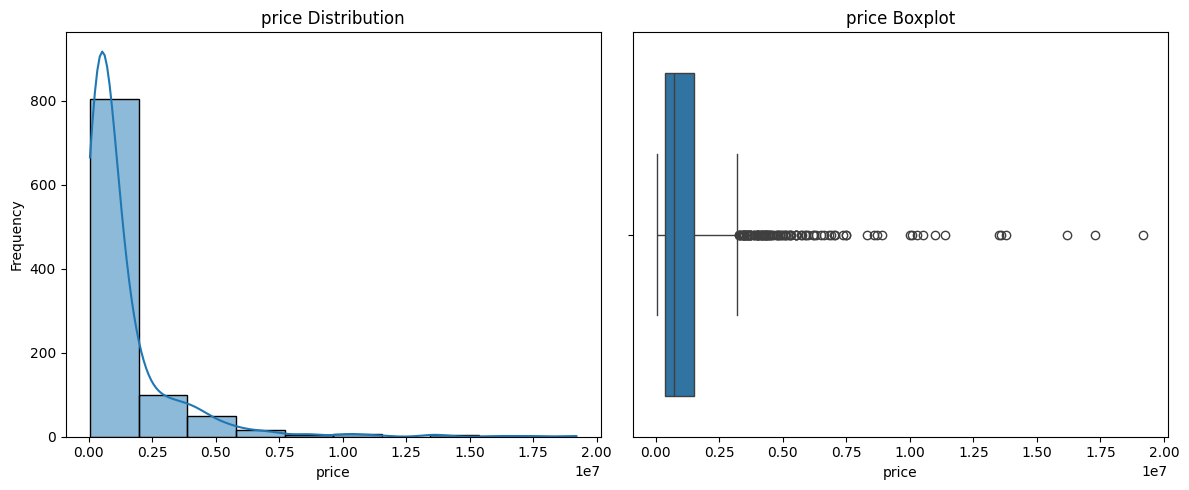

In [ ]:
def histogram(df , field="price"):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[field], bins=10, kde=True)
  plt.title(f'{field} Distribution')
  plt.xlabel(field)
  plt.ylabel('Frequency')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[field])
  plt.title(f'{field} Boxplot')
  plt.xlabel(field)
  plt.tight_layout()
  plt.show()

histogram(total)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
def statistics(df , field="price"):
  print(f"Statistics for {field}:")
  print(df[field].describe( percentiles=[0.25, 0.50, 0.75, 0.95]))
  if pd.api.types.is_numeric_dtype(df[field]):
     q1 = df[field].quantile(0.25)
     q3 = df[field].quantile(0.75)
     iqr = q3 - q1
     lower_bound = q1 - 1.5 * iqr
     upper_bound = q3 + 1.5 * iqr
     outliers = df[(df[field] < lower_bound) | (df[field] > upper_bound)]
     print(f"\nOutliers in {field}:", outliers.shape[0])

statistics(total, "price")


Statistics for price:
count        984.00
mean     1371684.91
std      1951147.16
min        45327.00
25%       349900.00
50%       713130.83
75%      1495621.02
95%      4793150.00
max     19197000.00
Name: price, dtype: float64

Outliers in price: 110


[]

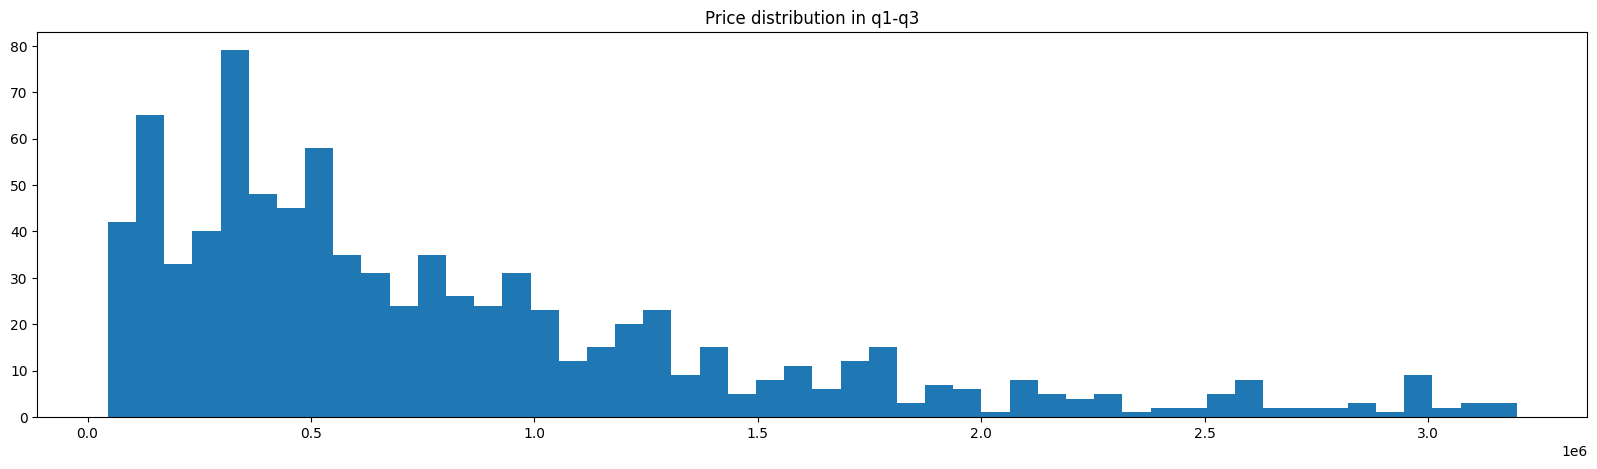

In [ ]:
#Distribucion del precio en el rango intercuartilico
q1 = total["price"].quantile(0.25)
q3 = total["price"].quantile(0.75)
iqr = q3 - q1
plt.figure(figsize=(20, 5))
plt.hist(total.loc[total["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.title("Price distribution in q1-q3")
plt.plot()

**Atributo 2 Meses de garantia (warranty_months) - Analisis medidas de tendencia central y distribucion:**

Los meses de garantia varian entre 0 y 24 meses, siendo la 12 meses la garantia mas comun entre las ofertas.


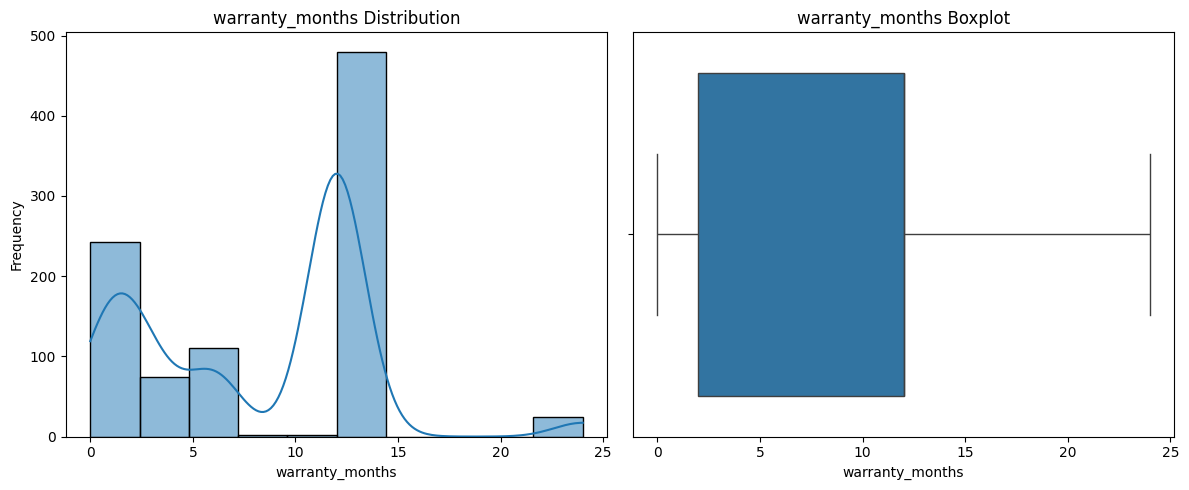

In [ ]:
histogram(total, "warranty_months")

In [ ]:
statistics(total, "warranty_months")

Statistics for warranty_months:
count   936.00
mean      8.10
std       5.46
min       0.00
25%       2.00
50%      12.00
75%      12.00
95%      12.00
max      24.00
Name: warranty_months, dtype: float64

Outliers in warranty_months: 0


**Atributo 3 Brand - Analisis medidas de tendencia central y distribucion:** Hay un total de 80 marcas de celulares, siendo Xiaomi la que tiene mayor cantidad de referencias ofertadas (152). El top 10 de las marcas con mayor numero de referencias ofertadas son: Xiaomi, Samsung, Motorola, Apple, Tecno, Generic, ZTE, Infinix, Oppo y Corn. El 53% de las ofertas se concentran en las marcas: Xiaomi, Samsung, Motorola y Apple.

In [ ]:
statistics(total, "brand")

Statistics for brand:
count        984
unique        80
top       Xiaomi
freq         152
Name: brand, dtype: object


In [ ]:
def print_top(df,field="brand"):
   top_10_brands = total[field].value_counts().head(10).index.tolist()
   print(top_10_brands)

print_top(total)

['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn']


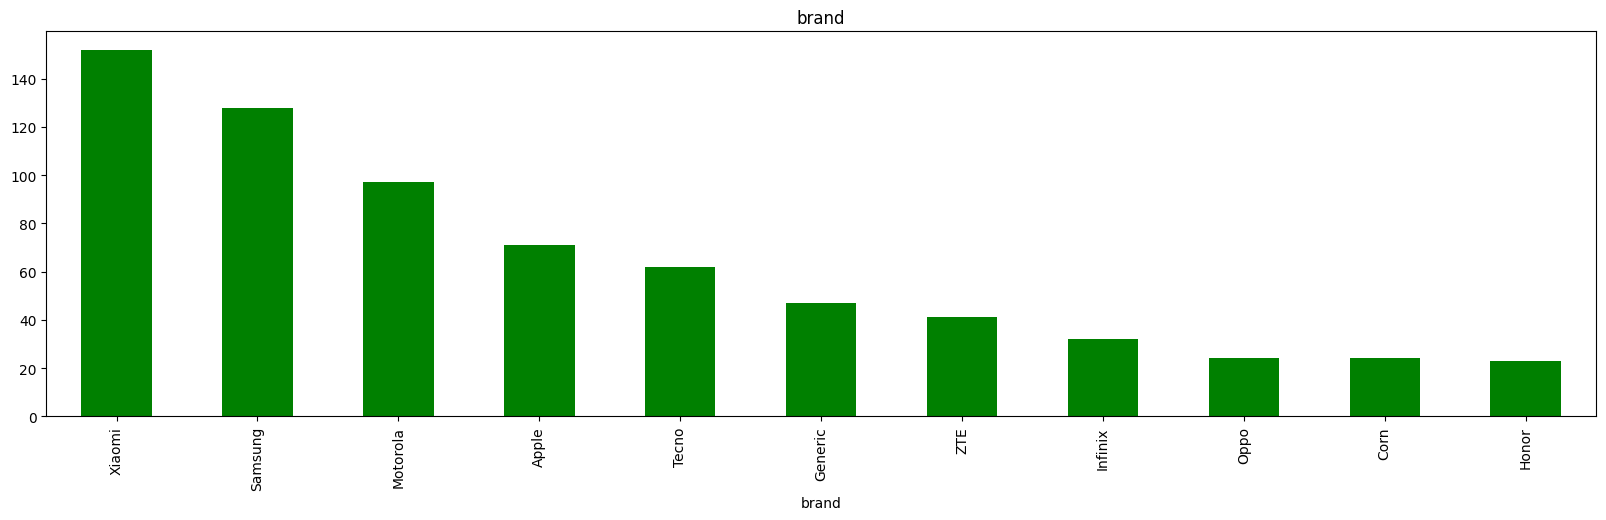

In [ ]:
def histogram_object(df , field="brand"):
  qty=len(df[field].value_counts())
  data={}
  if qty > 10:
    data=df[field].value_counts()[:11]
  else:
    data=df[field].value_counts()
  fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
  data.plot(kind="bar", ax=ax1, color="green")
  ax1.set_title(field)
  plt.show()

histogram_object(total)

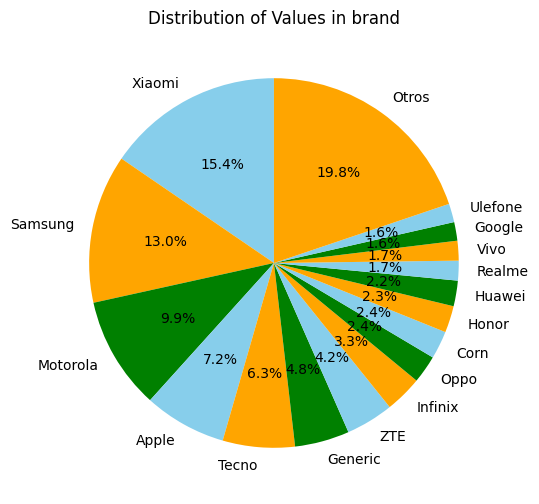

In [ ]:
def print_pie(df, field="brand"):
  threshold=16
  value_counts = df[field].value_counts()
  qty=len(value_counts)
  if qty > threshold:
    other_cats_sum=value_counts[threshold:].sum()
    value_counts = value_counts[:threshold]
    value_counts['Otros'] = other_cats_sum
  else:
    value_counts = value_counts
  plt.figure(figsize=(6, 6))
  value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
  plt.ylabel('')  # Remove the y-axis label
  plt.title(f'Distribution of Values in {field}')
  plt.show()
print_pie(total)

**Atributo 4  Reputacion (seller_reputation) - Analisis medidas de tendencia central y distribucion:** El 93% de los vendedores tiene el mayor nivel de reputacion equivalente a 5_green.

In [ ]:
statistics(total, "seller_reputation_level_id")

Statistics for seller_reputation_level_id:
count         980
unique          3
top       5_green
freq          920
Name: seller_reputation_level_id, dtype: object


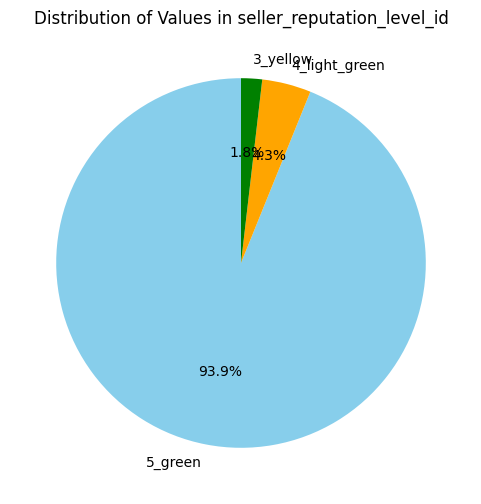

In [ ]:
print_pie(total, "seller_reputation_level_id")

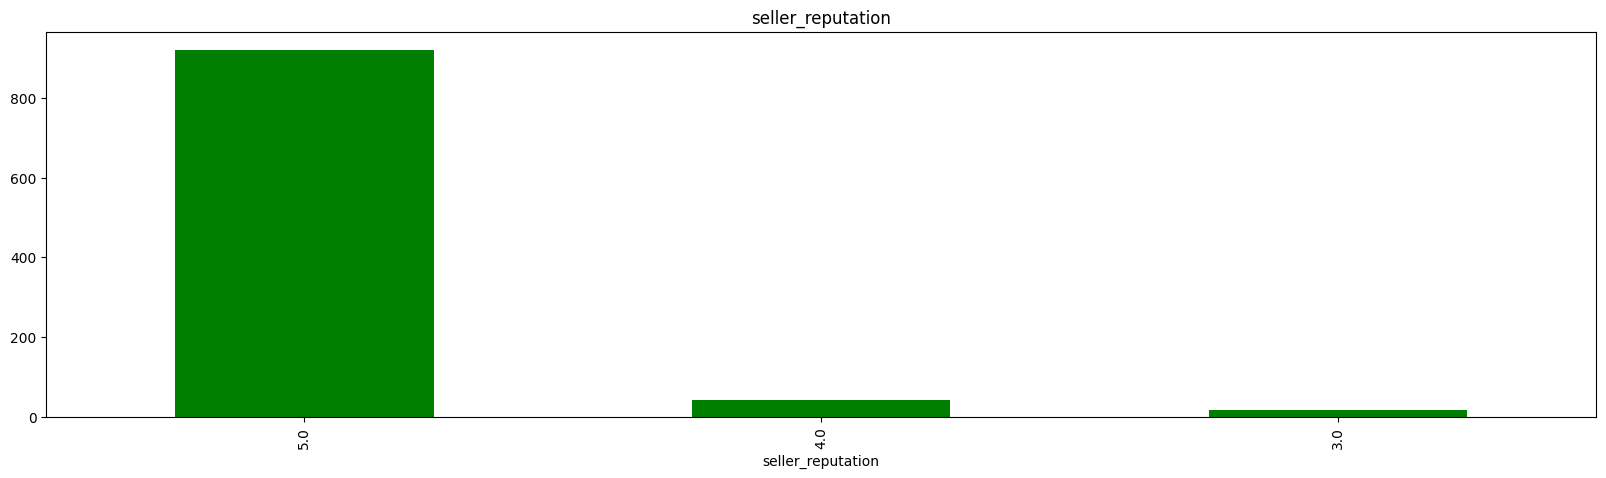

In [ ]:
histogram_object(total, "seller_reputation")

In [ ]:
field="seller_reputation_level_id"
total[field].value_counts(dropna=False, normalize=True)

,proportion
seller_reputation_level_id,
5_green,0.93
4_light_green,0.04
3_yellow,0.02
None,0.00


### **2.2 Analisis Bivariado**

Se examinan las relaciones:

*   Precio vs. brand
*   Precio vs. RAM
*   Precio vs. Almacenamiento
*   Calificacion vendedor vs. Tipo de tienda.


# **2.2.1. Precio vs. Brand:**
Samsung y Apple tienen la oferta de celulares con mayor precio. La oferta celulares con bajo precio se concentra en las marcas Corn y Generic.

top brand: ['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn']


<Figure size 12000x600 with 0 Axes>

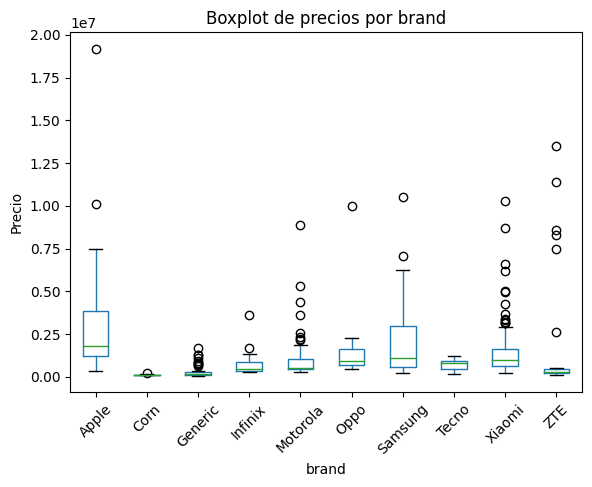

In [ ]:
def comparative_boxplot(df, field):
  field_count = df[field].value_counts(dropna=False, normalize=True)
  top = field_count.index.tolist()
  if len(top) > 10:
    top = top[:10]
  print(f"top {field}:", top)
  plt.figure(figsize=(120, 6))
  total[df[field].isin(top  )].boxplot(column='price', by=field, grid=False)
  plt.title(f'Boxplot de precios por {field}')
  plt.suptitle('')  # Eliminar el título superior automático
  plt.xlabel(field)
  plt.ylabel('Precio')

  plt.xticks(rotation=45)
  plt.show()

comparative_boxplot(total, "brand")

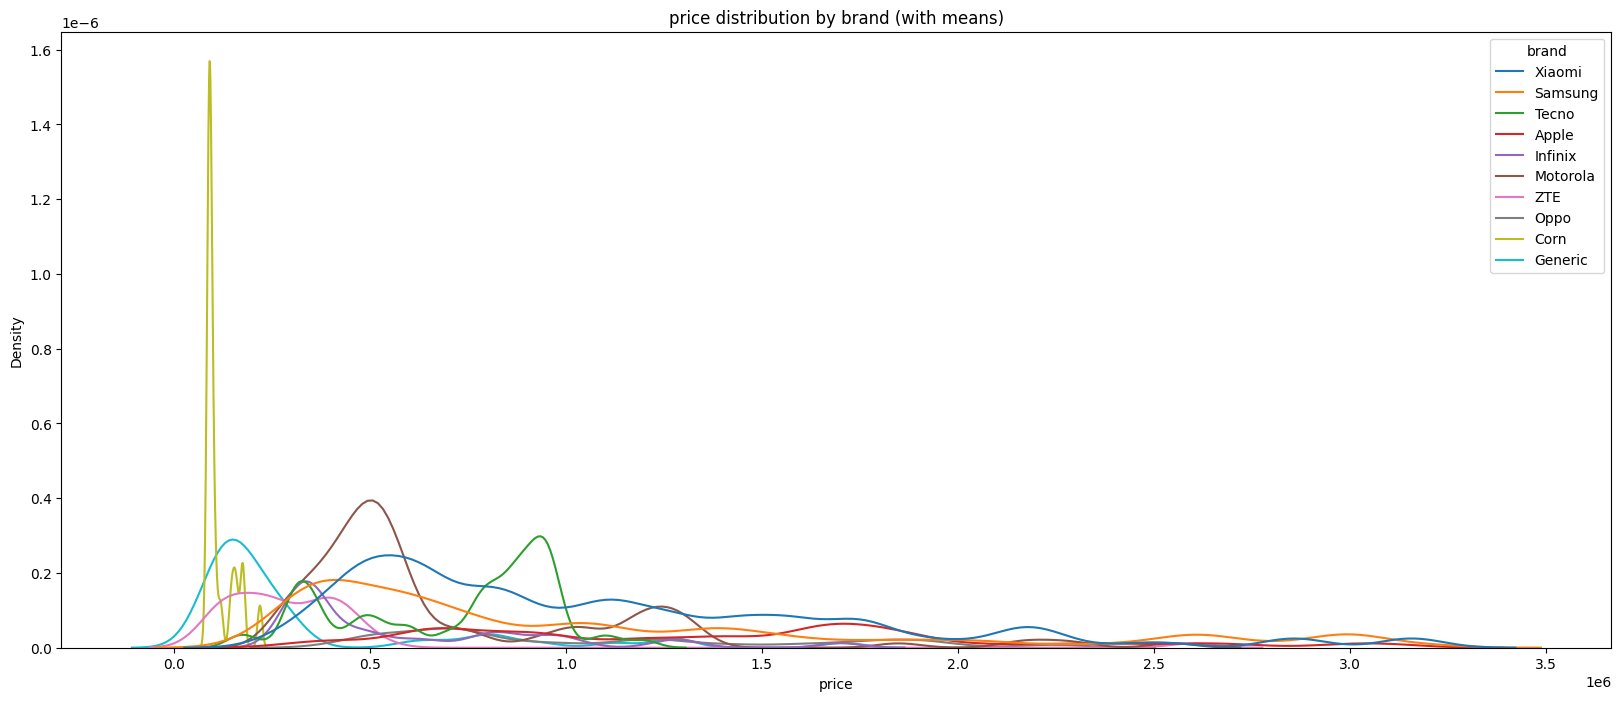

In [ ]:
def line_graph(df, field="brand", x_var="price"):
  density_var=field

  top_brands = df[field].value_counts().head(10).index.tolist()
  marcas_frec_cumsum=df[field].value_counts(normalize=True).cumsum()

  q1 = df[x_var].quantile(0.25)
  q2 = df[x_var].quantile(0.50)
  q3 = df[x_var].quantile(0.75)

  fig, ax = plt.subplots(1, 1, figsize=(20, 8))
  sns.kdeplot(
      data=df.loc[df[x_var] <= (q3 + 1.5 * iqr)].loc[df[field].isin( top_brands )],
      x=x_var,
      hue=field,
      bw_adjust=.3,
      ax=ax
  )
  for (brand, color) in zip( marcas_frec_cumsum , ["steelblue", "orange", "green"]):
      ax.axvline(df.loc[df[ x_var ] <= (q3 + 1.5 * iqr)].loc[df[ density_var] == brand, density_var].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
  plt.title(f"{x_var} distribution by {density_var} (with means)")
  plt.show()

line_graph(total, "brand")

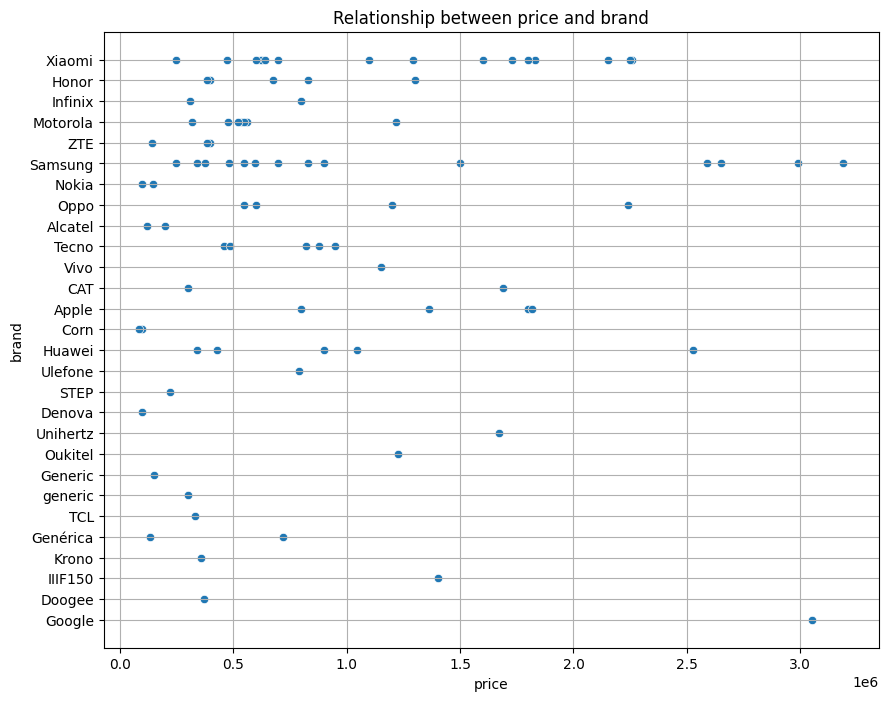

In [ ]:
def print_relation(df, field_y, field_x="price", use_sample=False):
  q1 = df[field_x].quantile(0.25)
  q2 = df[field_x].quantile(0.50)
  q3 = df[field_x].quantile(0.75)
  iqr = q3 - q1
  total_sample_df =  df.loc[df[field_x] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
  if use_sample:
    total_sample_df = df

  plt.figure(figsize=(10, 8))
  sns.scatterplot(
      x=total_sample_df[field_x],
      y=total_sample_df[field_y]
  )
  plt.title(f"Relationship between {field_x} and {field_y}")
  plt.grid()
  plt.show()

print_relation(total, "brand")

In [ ]:
# Calculando las 10 marcas de celulares mas costosos
baratos=total[total["price"] >= (q3)]
expensive_brands=baratos["brand"].value_counts(dropna=False).head(10).index.to_list()
print(expensive_brands)

['Samsung', 'Apple', 'Xiaomi', 'Google', 'Motorola', 'CAT', 'Huawei', 'Oppo', 'Sony', 'ZTE']


In [ ]:
# Calculando las 10 marcas de celulares mas economicos
baratos=total[total["price"] <= (q1)]
cheap_brands=baratos["brand"].value_counts(dropna=False).head(10).index.to_list()
print(cheap_brands)


['Generic', 'Corn', 'ZTE', 'Alcatel', 'Samsung', 'Nokia', 'Infinix', 'Tecno', 'Motorola', 'Genérica']


**2.2.2. Precio vs. RAM:** Se observa que a mayor capacidad de RAM en un celular, mayor es su precio. Los celulares con RAM de 16 GB tienen una mediana de precio menor a la mediana de celulares con 12 GB

top ram_mb: [8192.0, 4096.0, 12288.0, 6144.0, 3072.0, 16384.0, 2048.0, 1024.0, 32.0, nan]


<Figure size 12000x600 with 0 Axes>

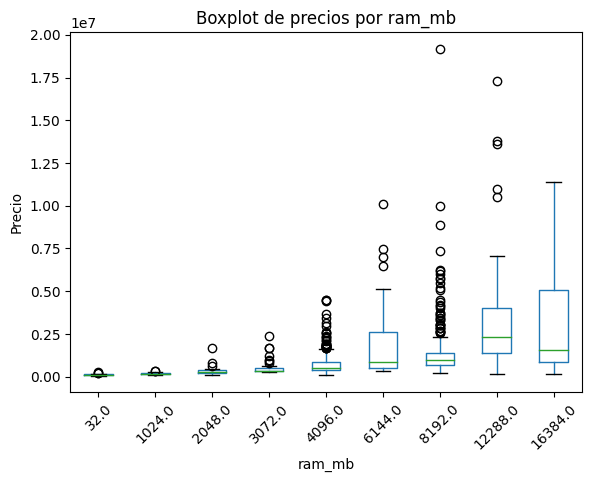

In [ ]:
comparative_boxplot(total, "ram_mb")


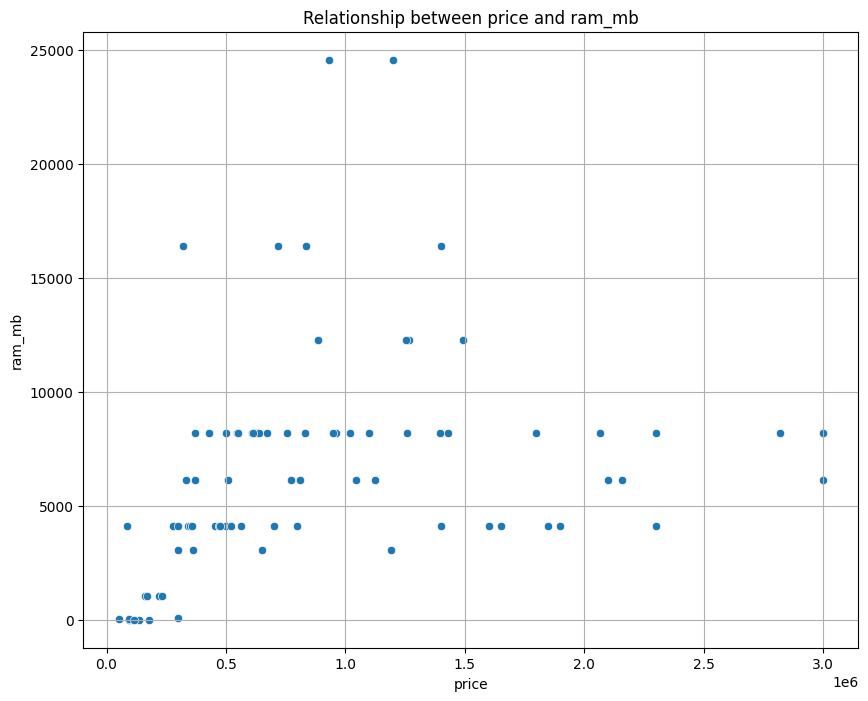

In [ ]:
print_relation(total, "ram_mb")

**2.2.3. Precio vs. Almacenamiento:**

Se observa que entre mayor capacidad de almacenamiento, la mediana de precio tambien aumenta.

top internal_memory_mb: [262144.0, 131072.0, 65536.0, 524288.0, 32768.0, 32.0, 16384.0, 128.0, nan, 0.0]


<Figure size 12000x600 with 0 Axes>

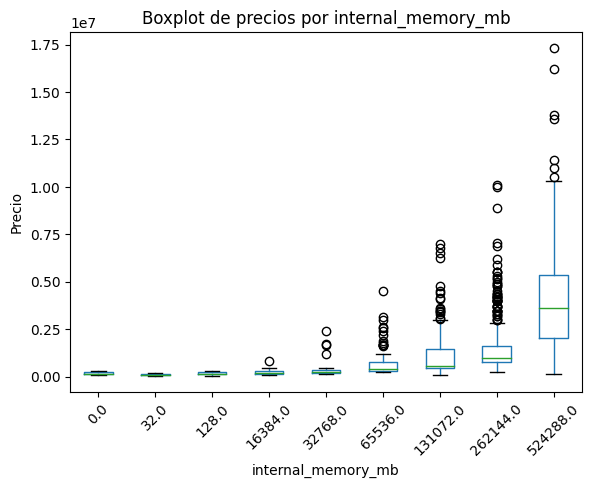

In [ ]:
comparative_boxplot(total, "internal_memory_mb")


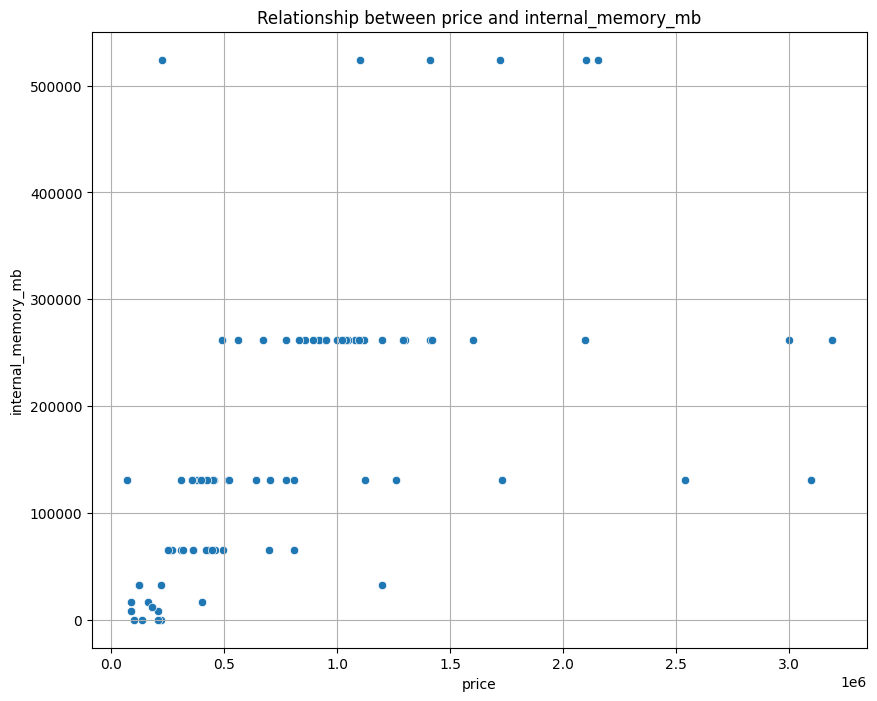

In [ ]:
print_relation(total, "internal_memory_mb")

**2.2.4. Calificacion vendedor vs. Tipo de tienda.:** De las 84 tiendas oficiales, hay  76 con calificacion de reputacion maxima y 8 con calificacion de reputacion igual a 4.

In [ ]:
def print_pivot(df, field_x="seller_reputation", field_y="has_official_store"):
  #df[field_x] = df[field_x].astype(int)
  df[field_y] = df[field_y].astype(int)
  pivot_table = pd.pivot_table(total,
                             values=field_y,  # Summarizing the seller reputation
                             index=field_x,  # Group by official store status
                             aggfunc='sum',  #
                             fill_value=0)  # Fill NaN with 0
  print(pivot_table)
print_pivot(total, "seller_reputation", "has_official_store")

                   has_official_store
seller_reputation                    
3.00                                0
4.00                                8
5.00                               76


**Analisis de variabilidad:** Hay 70.737 unidades disponibles con una mediana de precio de 713.000 COP, distribuidas en 984 referencias de celulares en 80 marcas, de las cuales las mas representativas segun la cantidad de ofertas son: Xiaomi, Samsung, Motorola, Apple, Tecno, Generic, ZTE, Infinix, Oppo y Corn. Samsung y Apple tienen la oferta de celulares con mayor precio. La oferta celulares con bajo precio se concentra en las marcas Corn y Generic. El precio de los celulares se relaciona directamente con la capacidad de almacenamiento y la capacidad en RAM.

In [ ]:
#variabilidad

# Calculando la cantidad de celulares disponibles
available_cells=total["available_quantity"].sum()
# Calculando la cantidad de referencias de celulares ofertados en el dataset
offerings=total["item_id"].nunique()
print("celulares disponibles:", available_cells)
print("referencias de celulares ofertados:", offerings)
# Calculando la cantidad de marcas
unique_brands=total["brand"].nunique()
print("brands unicas:", unique_brands)
# calculando las 10 marcas con mayor numero de referencias de celular ofertados
top_brands=total["brand"].value_counts(dropna=False).head(10).index.to_list()
print("top brands:", top_brands)

celulares disponibles: 70737
referencias de celulares ofertados: 984
brands unicas: 80
top brands: ['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn']


# **3. Diseño y desarrollo de estrategia de recomendación**

# **3.1. Diseño de la estrategia.**
Brevemente describa, ¿cuáles considera que son los pasos más importantes para seleccionar el celular ideal?

1.   Considerar el universo de las ofertas.
2.   Identificar las caracteristicas del celular deseable para mama.
3.   Formar grupos con caracteristicas similares de acuerdo a las definiciones  del celular deseable.
4.   Seleccionar uno de los grupos.
5.   Dentro del grupo seleccionado, identificar la referencia del celular que mas se ajuste a las caractericas del celular deseado al mejor precio.


#**3.2 De forma iterativa, desarrolle el proceso de selección del o de los tipos de celulares deseados.**

**3.2.1 Se considera el total del dataset**

In [ ]:
total.shape

(984, 33)

**3.2.2 Caracteristicas del celular deseable para mama:**

*   Celular con la mayor capacidad de almacenamiento, pues a mamá le gusta mucho guardar fotos, recetas y videos.
*   Mayor memoria (RAM)
*   Garantia mayor a o igual a 6 meses





**3.2.3 Formar grupos**


Se definen tres grupos por gamas:

El primer grupo "gama-alta" serán aquellos celulares con memoria_interna >200 GB y ram >8 GB y garantia > 6meses.

El segundo grupo "gama-media" serán aquellos celulares con memoria_interna  entre 50 y 200 GB y ram  entre 4 y 8 GB y garantia >= 3meses.

El tercer grupo "gama-baja" seran aquellos celulares con memoria_interna menor a 50 GB y ram menor a 4 GB y sin garantia'


In [ ]:


def classify_cell(row):
    if row['internal_memory_mb'] >= 200000 and row['ram_mb'] >= 8000 and row["warranty_months"]>=6   :
        return 'gama-alta'
    elif 50000 <= row['internal_memory_mb'] <= 200000 and 4000 <= row['ram_mb'] <= 8000 and row["warranty_months"]>=3:
        return 'gama-media'
    else:
        return 'gama-baja'

total['cluster'] = total.apply(classify_cell, axis=1)

total["cluster"].value_counts()

,count
cluster,
gama-baja,525
gama-alta,276
gama-media,183


**3.2.4 Prueba Estadistica**

De acuerdo al resultado de la prueba estadistica se establece que los grupos de gama alta y gama media tienen diferencia en sus medias con respecto a la variable precio, es decir, la hipotesis nula fue rechazada.

In [ ]:
df=total
field="cluster"
print(df[field].value_counts())
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

#Step0: Choose the appropriate test: t-test vs. Mann-Whitney.

#step1: define null and alernative hypothesis
#     Ho:  u1=u2
#     H1:  u1!=u2

selected_groups=["gama-alta","gama-media"]

#Step2: Define the significance level
alpha = 0.01

#Step3-4: calculate the statistic and p-value
# Assuming normality
t_stat, p_value = ttest_ind(
    df.loc[df[field] == selected_groups[0], "price"],
    df.loc[df[field] == selected_groups[1], "price"],
    equal_var=False
)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Testing normality for each group
print(f"{selected_groups[0]}:", shapiro( df.loc[ df[field] == selected_groups[0], "price"])[1])
print(f"{selected_groups[1]}:", shapiro( df.loc[ df[field] == selected_groups[1], "price"])[1])

# Applying a non-parametric test
t_stat, p_value = mannwhitneyu(
    df.loc[ df[field] == selected_groups[0], "price"],
    df.loc[ df[field] == selected_groups[1], "price"]
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

#Step5: Make the decision

if p_value <= alpha:
    print(f"REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is statistically significant.")
else:
    print(f"FAIL TO REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is not statistically significant.")



cluster
gama-baja     525
gama-alta     276
gama-media    183
Name: count, dtype: int64
T-statistic: 8.537346556538852
P-value: 2.2288132860276507e-16
gama-alta: 6.5758018042844146e-21
gama-media: 9.324902258556073e-20
T-statistic: 41367.5
P-value: 5.193937823737215e-31
REJECT THE NULL HYPOTHESIS: The difference in listing price between gama-alta and gama-media groups is statistically significant.


#**3.3 De forma paralela o complementaria al punto anterior, desarrolle el proceso para recomendar el celular que se debe comprar.**

**3.3.1 Seleccionar uno de los grupos**

Se selecciona uno de los grupos, en este caso se selecciono el grupo de gama alta puesto que aqui podemos encontrar las mejores caracteristicas del celular para mama.

In [ ]:
cols=["sanitized_title","price","internal_memory_mb","ram_mb","warranty_months","address_state","free_shipping","seller_reputation","installments_amount","official_store_id", "condition", "DISPLAY_RESOLUTION"]
selected_all=total[ (total["cluster"]=="gama-alta") ][cols]


**3.3.2 Dentro del grupo seleccionado, se identifica la referencia del celular que mas se ajuste a las caractericas del celular deseado al mejor precio.**

In [ ]:
selected_all.sort_values(by="price",ascending=True)[:10]

,sanitized_title,price,internal_memory_mb,ram_mb,warranty_months,address_state,free_shipping,seller_reputation,installments_amount,official_store_id,condition,DISPLAY_RESOLUTION
187,celular-kalley-black-3-256gb-negro,449000.0,262144.0,8192.0,12.0,CO-CUN,True,5.0,12472.0,NaN,new,None
533,celular-tecno-spark-20c-256gb-ram-4gb-cam-50mpx,459900.0,262144.0,8192.0,6.0,CO-ANT,True,5.0,12775.0,NaN,new,720 px x 1612 px
22,tecno-spark-20-dual-sim-256-gb-negro-8-gb-ram,484900.0,262144.0,8192.0,12.0,CO-ANT,True,5.0,13469.0,NaN,new,720 px x 1612 px
124,celular-infinix-hot-40i-dual-sim-256gb-dorado-...,484900.0,262144.0,8192.0,12.0,CO-ANT,True,5.0,13469.0,NaN,new,None
83,celular-infinix-hot-40i-dual-sim-256gb-ram-88g...,489900.0,262144.0,8192.0,12.0,CO-CUN,True,5.0,13608.0,1360.0,new,720 px x 1612 px
358,celular-motorola-g24-256gb-8ram-50mpx,489900.0,262144.0,8192.0,12.0,CO-DC,True,5.0,13608.0,NaN,new,None
348,infinix-hot-40i-dual-sim-256-gb-verde-8-8-gb-ram,490049.0,262144.0,8192.0,12.0,CO-DC,True,5.0,13612.0,NaN,new,720 px x 1612 px
637,motorola-moto-g24-power-256gb-8gb-ram-ss-celeste,499900.0,262144.0,8192.0,12.0,CO-TOL,True,5.0,13886.0,NaN,new,None
534,redmi-13c-4-ram-256-gb,500000.0,262144.0,8192.0,12.0,CO-DC,True,NaN,13889.0,NaN,new,720 px x 1600 px
43,celular-tecno-spark-10-pro-dual-sim-256-gb-8gb...,519000.0,262144.0,8192.0,12.0,CO-DC,True,5.0,14417.0,NaN,new,1080 px x 2460 px


Teniendo en cuenta que la consulta anterior arrojo como mejor opcion un celular marca Kalley, el cual es poco comun, se desea explorar otras opciones  haciendo acotación a las marcas mas representativas es decir: Xiaomi, Samsung, Motorola y Apple

In [ ]:
#tomar dos grupos dentro de gama-alta
#se define una nueva columna "is_rep_brand"
known_brands=["Samsung","Motorola","Apple","Xiaomi"]
def is_rep_brand(row):
    if row['brand'] in known_brands:
        return 1
    else:
        return 0

total['is_rep_brand'] = total.apply(is_rep_brand, axis=1)
total["is_rep_brand"].value_counts()

cols=["sanitized_title","price","internal_memory_mb","ram_mb","warranty_months","address_state","free_shipping","seller_reputation","installments_amount","official_store_id", "condition", "DISPLAY_RESOLUTION"]
selected_group=total[ (total["cluster"]=="gama-alta") & ( total["is_rep_brand"]==1 )][cols]


In [ ]:
selected_group[selected_group["price"]<=1200000].sort_values(by="price",ascending=False)[:10]


,sanitized_title,price,internal_memory_mb,ram_mb,warranty_months,address_state,free_shipping,seller_reputation,installments_amount,official_store_id,condition,DISPLAY_RESOLUTION
263,smartphone-motorola-edge-50-fusion-5g-verde-25...,1199900.0,262144.0,16384.0,24.0,CO-TOL,True,5.0,33331.00,NaN,new,2400 px x 1080 px
125,xiaomi-redmi-note-13-pro-4g-dual-sim-512-gb-pu...,1199900.0,524288.0,12288.0,12.0,CO-SAN,True,5.0,33331.00,NaN,new,2400 px x 1080 px
451,smartphone-motorola-edge-50-fusion-5g-verde-25...,1196937.0,262144.0,16384.0,12.0,CO-DC,True,5.0,33248.00,NaN,new,2400 px x 1080 px
109,xiaomi-poco-poco-x6-pro-5g-dual-sim-256-gb-neg...,1179900.0,262144.0,8192.0,12.0,CO-CUN,True,5.0,32775.00,NaN,new,1220 px x 2712 px
585,motorola-edge-50-fusion-5g-duos-256-gb-8-ram-o...,1179000.0,262144.0,8192.0,24.0,CO-QUI,True,5.0,32750.00,NaN,new,2400 px x 1080 px
420,motorola-edge-edge-40-neo-5g-dual-sim-256-gb-a...,1158000.0,262144.0,8192.0,12.0,CO-DC,True,5.0,32166.67,NaN,new,1080 px x 2400 px
13,xiaomi-redmi-note-13-pro-5g-dual-sim-256-gb-ne...,1149900.0,262144.0,8192.0,6.0,CO-DC,True,5.0,31942.00,NaN,new,2712 px x 1220 px
555,moto-edge-40-neo-256gb-ram-8gb,1149900.0,262144.0,8192.0,12.0,CO-DC,True,5.0,31942.00,NaN,new,None
223,xiaomi-redmi-note-13-pro-5g-dual-sim-256-gb-8-...,1144900.0,262144.0,8192.0,6.0,CO-DC,True,5.0,31803.00,NaN,new,2712 px x 1220 px
500,xiaomi-redmi-note-13-pro-256gb8gb-lavanda-redm...,1115900.0,262144.0,8192.0,6.0,CO-DC,True,5.0,30997.00,NaN,new,240 px x 280 px



#**3.2. CONCLUSION**

De acuerdo al resultado anterior, la opcion que mas se ajusta a las caracteristicas del celular deseable para mama es:

smartphone-motorola-edge-50-fusion-5g-verde-25G

Este celular tiene un precio de 1.199.900 COP, capacidad de almacenamiento de 256 GB, 16 GB de memoria RAM y cuenta con garantia de 24 meses.
